In [1]:
# Importing dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Importing additional dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
# Inspecting the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [17]:
# Let's try to get a list of column names and types for measurement
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [18]:
# Let's try to get a list of column names and types for station
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
engine.execute("SELECT * FROM measurement LIMIT 30").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
engine.execute("SELECT * FROM measurement LIMIT 12").fetchall()
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [35]:
# Calculate the date one year from the last date in data set.
one_year_date = session.query(func.max(Measurement.date)).all()
one_year_date

[('2017-08-23',)]

In [39]:
# Perform a query to retrieve the data and precipitation scores
precip_score = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= "2010-01-01").\
filter(Measurement.date <= "2017-08-23").\
group_by(Measurement.date).all()
precip_score

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-13', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-29', 0.19),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-02', 0.0),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-10', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0

In [51]:
# Save the query results as a Pandas DataFrame 
precip_score_df = pd.DataFrame(precip_score, columns = ["date", "prcp"])

precip_score_df.head()

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-05,0.00


In [52]:
# Set the index to the date column on the DataFrame
#precip_score_df.sort_values(by = "date", ascending = True)
precip_rename=precip_score_df.rename(columns= {0:"Date", 1:"Precipitation"}, inplace = True)
precip_rename=precip_score_df.set_index("date")
precip_rename.head()

,prcp
date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-05,0.00


In [79]:
# Sort the dataframe by date
precip_rename.sort_values(by = "date", ascending = True)

,prcp
date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-05,0.00
...,...
2017-08-19,0.00
2017-08-20,0.00
2017-08-21,0.00


<Figure size 432x288 with 0 Axes>

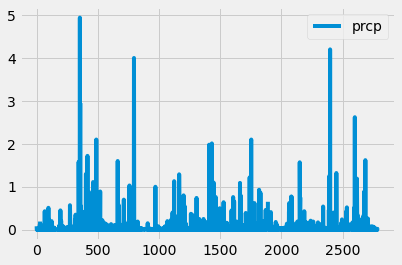

<Figure size 432x288 with 0 Axes>

In [81]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_score_df.plot()
plt.figure()



In [65]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_score_df.describe()

,prcp
count,2753.000000
mean,0.053814
std,0.240275
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,4.940000


# Exploratory Station Analysis

In [75]:
# Design a query to calculate the total number stations in the dataset
stations_total = session.query(func.count(Station.station)).all()
stations_total

[(9,)]

In [69]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_active = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
stations_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [76]:
# Station with the most active 
station_most_active = stations_active[0]
station_most_active

('USC00519281', 2772)

In [70]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_obs = session.query(Measurement.station, func.min(Measurement.tobs),\
                         func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()
temp_obs

[('USC00519397', 53.0, 87.0, 73.09795396419437)]

In [71]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_active_temp = session.query(Measurement.tobs).\
filter(Measurement.date >= "2010-01-01").\
filter(Measurement.station == "USC00519281").all()

station_active_temp

[(70.0,),
 (62.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (76.0,),
 (69.0,),
 (66.0,),
 (70.0,),
 (75.0,),
 (64.0,),
 (60.0,),
 (61.0,),
 (68.0,),
 (64.0,),
 (66.0,),
 (67.0,),
 (70.0,),
 (67.0,),
 (67.0,),
 (69.0,),
 (60.0,),
 (75.0,),
 (75.0,),
 (65.0,),
 (75.0,),
 (69.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (72.0,),
 (67.0,),
 (65.0,),
 (64.0,),
 (67.0,),
 (67.0,),
 (68.0,),
 (69.0,),
 (66.0,),
 (69.0,),
 (61.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (66.0,),
 (71.0,),
 (61.0,),
 (68.0,),
 (67.0,),
 (62.0,),
 (65.0,),
 (69.0,),
 (63.0,),
 (62.0,),
 (61.0,),
 (64.0,),
 (72.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (69.0,),
 (65.0,),
 (67.0,),
 (71.0,),
 (70.0,),
 (69.0,),
 (69.0,),
 (70.0,),
 (69.0,),
 (70.0,),
 (73.0,),
 (74.0,),
 (67.0,),
 (68.0,),
 (64.0,),
 (65.0,),
 (68.0,),
 (68.0,),
 (72.0,),
 (67.0,),
 (64.0,),
 (71.0,),
 (70.0,),
 (72.0,),
 (73.0,),
 (74.0,),
 (69.0,),
 (71.0,),
 (72.0,),
 (71.0,),
 (74.0,),
 (73.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (69.0,),
 (72.0,),
 (68.0,),
 (75.0,),


In [85]:
# changing the data set from a list of tuples into simple list of numbers
temps = [t[0] for t in station_active_temp]
temps

[70.0,
 62.0,
 74.0,
 75.0,
 74.0,
 76.0,
 69.0,
 66.0,
 70.0,
 75.0,
 64.0,
 60.0,
 61.0,
 68.0,
 64.0,
 66.0,
 67.0,
 70.0,
 67.0,
 67.0,
 69.0,
 60.0,
 75.0,
 75.0,
 65.0,
 75.0,
 69.0,
 67.0,
 66.0,
 69.0,
 72.0,
 67.0,
 65.0,
 64.0,
 67.0,
 67.0,
 68.0,
 69.0,
 66.0,
 69.0,
 61.0,
 71.0,
 70.0,
 70.0,
 66.0,
 71.0,
 61.0,
 68.0,
 67.0,
 62.0,
 65.0,
 69.0,
 63.0,
 62.0,
 61.0,
 64.0,
 72.0,
 68.0,
 68.0,
 68.0,
 71.0,
 69.0,
 65.0,
 67.0,
 71.0,
 70.0,
 69.0,
 69.0,
 70.0,
 69.0,
 70.0,
 73.0,
 74.0,
 67.0,
 68.0,
 64.0,
 65.0,
 68.0,
 68.0,
 72.0,
 67.0,
 64.0,
 71.0,
 70.0,
 72.0,
 73.0,
 74.0,
 69.0,
 71.0,
 72.0,
 71.0,
 74.0,
 73.0,
 71.0,
 71.0,
 69.0,
 69.0,
 72.0,
 68.0,
 75.0,
 69.0,
 65.0,
 68.0,
 65.0,
 66.0,
 64.0,
 69.0,
 69.0,
 70.0,
 69.0,
 69.0,
 69.0,
 70.0,
 77.0,
 77.0,
 71.0,
 71.0,
 70.0,
 70.0,
 72.0,
 73.0,
 71.0,
 70.0,
 72.0,
 73.0,
 72.0,
 68.0,
 76.0,
 77.0,
 73.0,
 69.0,
 71.0,
 73.0,
 73.0,
 77.0,
 73.0,
 73.0,
 72.0,
 72.0,
 71.0,
 73.0,
 72.0,
 72.0,

<Figure size 432x288 with 0 Axes>

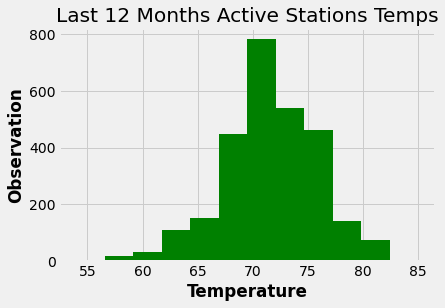

<Figure size 432x288 with 0 Axes>

In [87]:
# Plotting the the results of the last 12months query as a histogram with bins=12
plt.hist(temps, bins=12, color="green")
plt.title("Last 12 Months Active Stations Temps")
labels = ["tobs"]
plt.xlabel("Temperature", weight="bold")
plt.ylabel("Observation", weight="bold")
plt.figure(2)

# Close session

In [72]:
# Close Session
session.close()